#                                                **"ID card matching"**

### The purpose of this notebook is to show how to match an ID card with a person's photo.

#### **Libraries Used:**
>face_recognition

>matplotlib.pyplot

#### **What is face_recognition library?**
>Face_recognition is a library built using cv2 that provides functions that can be used to match an ID card with a person's photo.

#### **face_recognition functions used:**

>face_recognition.face_locations: This function is used to find the location of faces in an image using the OpenCV library.

>face_recognition.face_encodings: This function is used to encode faces in an image using the OpenCV library.

>face_recognition.compare_faces: This function is used to compare faces in an image using the OpenCV library.

#### **How to use?**

>1. Load and encode images

>2. Compare faces

>3. Plot images

>4. Check the result


# +_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+

## **Import Libraries**

In [15]:
!pip install face_recognition

import face_recognition
import matplotlib.pyplot as plt


In [24]:
from PIL import Image, ImageDraw
import face_recognition
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import face_recognition

In [23]:
!mkdir known unknown

## **Load and Encode Images**

In [31]:
# Load the person's photo
MuhammadShahzaib_image = face_recognition.load_image_file("/content/sample_data/muhammadShahzaib.jpg")
person_face_encodings = face_recognition.face_encodings(MuhammadShahzaib_image)[0]

# Load the ID card photo
id_card_image = face_recognition.load_image_file("/content/sample_data/id_image.jpg")
id_card_face_encodings = face_recognition.face_encodings(id_card_image)[0]

## **Plot Images**

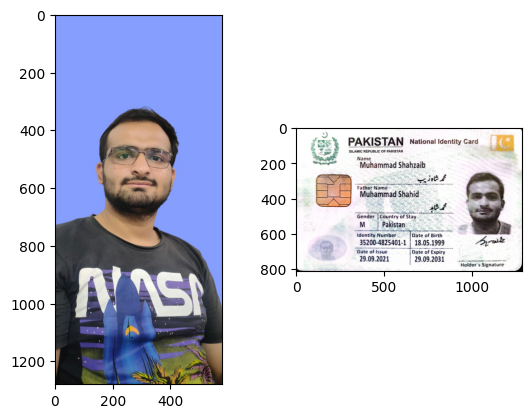

In [33]:
# plot both images
fig, ax = plt.subplots(1, 2)
ax[0].imshow(MuhammadShahzaib_image)
ax[1].imshow(id_card_image)

## **Check if faces were found**

In [34]:
# Check if faces were found
if len(person_face_encodings) == 0:
    print("No faces found in the image")

In [35]:
if len(id_card_face_encodings) == 0:
    print("No faces found in the image")

## **Compare Faces**

In [21]:
# person_face_locations = "/content/sample_data/muhammadShahzaib.jpg"
# id_card_face_locations = "/content/sample_data/id_image.jpg
# if person_face_locations:
#     person_face_encoding = face_recognition.face_encodings(person_image, known_face_locations=person_face_locations)[0]
# else:
#     raise ValueError("No faces found in the person image")

# if id_card_face_locations:
#     id_card_face_encoding = face_recognition.face_encodings(id_card_image, known_face_locations=id_card_face_locations)[0]
# else:
#     raise ValueError("No faces found in the ID card image")

In [38]:
# Compare the faces
person_face_encodings = face_recognition.face_encodings(MuhammadShahzaib_image)[0]
results = face_recognition.compare_faces([person_face_encodings], id_card_face_encodings)

In [39]:
results

[True]

## **Building a bounding box**

In [40]:
# Highlight faces in the images
person_face_locations = face_recognition.face_locations(person_image)
id_card_face_locations = face_recognition.face_locations(id_card_image)

In [42]:
# Create a function to plot with rectangles around faces
def plot_faces(image, face_locations, title):
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    for (top, right, bottom, left) in face_locations:
        plt.gca().add_patch(plt.Rectangle((left, top), right - left, bottom - top,
                                            edgecolor='red', linewidth=2, fill=False))

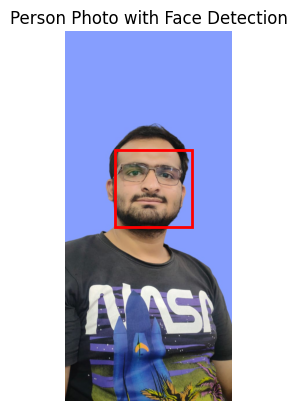

In [43]:
plot_faces(person_image, person_face_locations, "Person Photo with Face Detection")

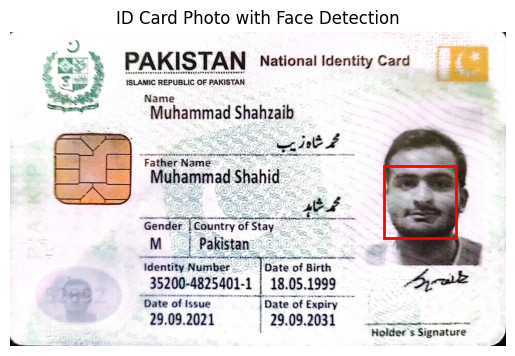

In [44]:
plot_faces(id_card_image, id_card_face_locations, "ID Card Photo with Face Detection")

## **Check the result**

In [45]:
# Check the result
if results[0]:
    print("The person matches their ID card photo.")
else:
    print("The person does not match their ID card photo.")

The person matches their ID card photo.


# **>> Make a function to compare faces**

In [49]:
import face_recognition
import matplotlib.pyplot as plt

def compare_faces(person_photo, id_card_photo):
    # Load the person's photo
    person_image = face_recognition.load_image_file(person_photo)
    person_face_encodings = face_recognition.face_encodings(person_image)

    # Load the ID card photo
    id_card_image = face_recognition.load_image_file(id_card_photo)
    id_card_face_encodings = face_recognition.face_encodings(id_card_image)

    # Check if faces were found
    if len(person_face_encodings) == 0 or len(id_card_face_encodings) == 0:
        print("No faces found in one of the images.")
        return

    person_face_encoding = person_face_encodings[0]
    id_card_face_encoding = id_card_face_encodings[0]

    # Compare the faces
    results = face_recognition.compare_faces([person_face_encoding], id_card_face_encoding)

    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(8, 6))

    # Display person's photo
    axes[0].imshow(person_image)
    axes[0].set_title("Person Photo")
    axes[0].axis('off')

    # Display ID card photo
    axes[1].imshow(id_card_image)
    axes[1].set_title("ID Card Photo")
    axes[1].axis('off')

    plt.show()



The person matches their ID card photo.


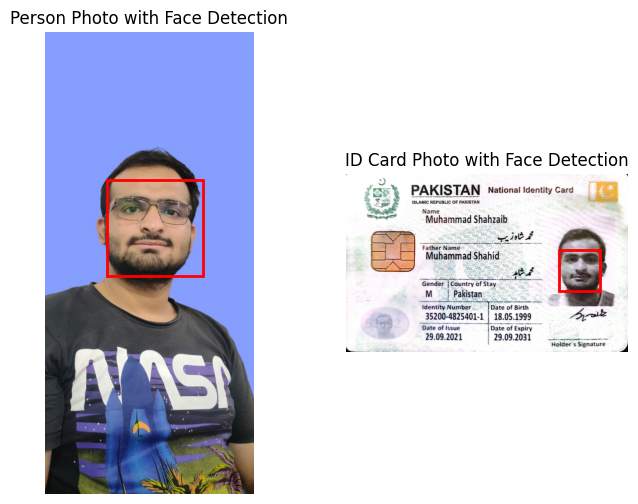

In [50]:
    # Check the result
    if results[0]:
        print("The person matches their ID card photo.")
    else:
        print("The person does not match their ID card photo.")

    # Highlight faces in the images
    person_face_locations = face_recognition.face_locations(person_image)
    id_card_face_locations = face_recognition.face_locations(id_card_image)

    # Create a function to plot with rectangles around faces
    def plot_faces(image, face_locations, title):
        plt.imshow(image)
        plt.title(title)
        plt.axis('off')
        for (top, right, bottom, left) in face_locations:
            plt.gca().add_patch(plt.Rectangle((left, top), right - left, bottom - top,
                                              edgecolor='red', linewidth=2, fill=False))

    # Plotting the faces with rectangles
    plt.figure(figsize=(8, 6))
    plt.subplot(1, 2, 1)
    plot_faces(person_image, person_face_locations, "Person Photo with Face Detection")

    plt.subplot(1, 2, 2)
    plot_faces(id_card_image, id_card_face_locations, "ID Card Photo with Face Detection")

    plt.show()

## **> Example usage**

### Person actually matches ID card

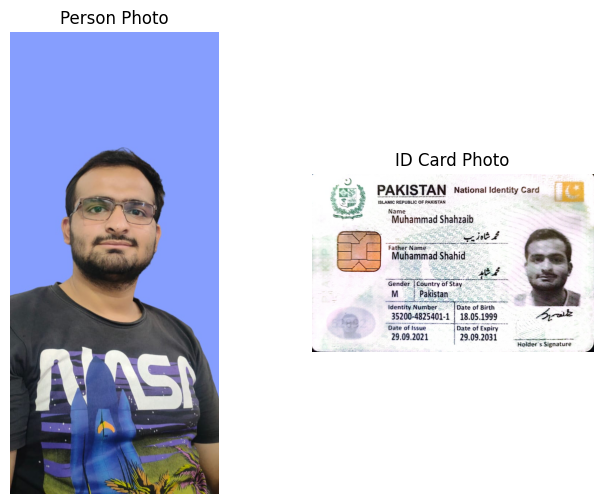

In [51]:
compare_faces("/content/sample_data/muhammadShahzaib.jpg", "/content/sample_data/id_image.jpg")

### Person not matches ID card

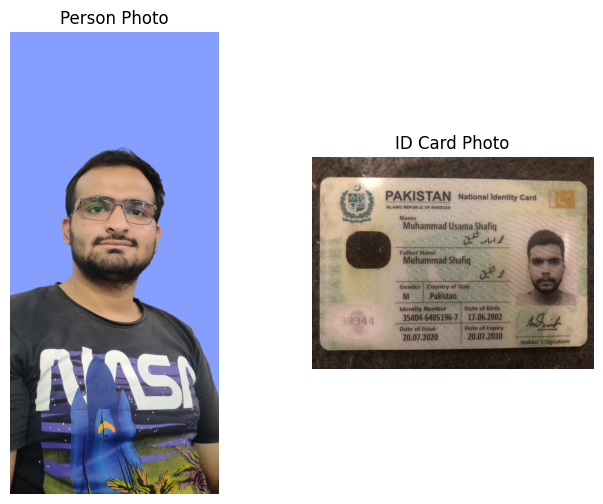

In [52]:
compare_faces("/content/sample_data/muhammadShahzaib.jpg", "/content/sample_data/other_id.jpg")

### No face in ID card

In [58]:
shahzaib ="/content/sample_data/muhammadShahzaib.jpg"
other_person ="/content/sample_data/other_id.jpg"

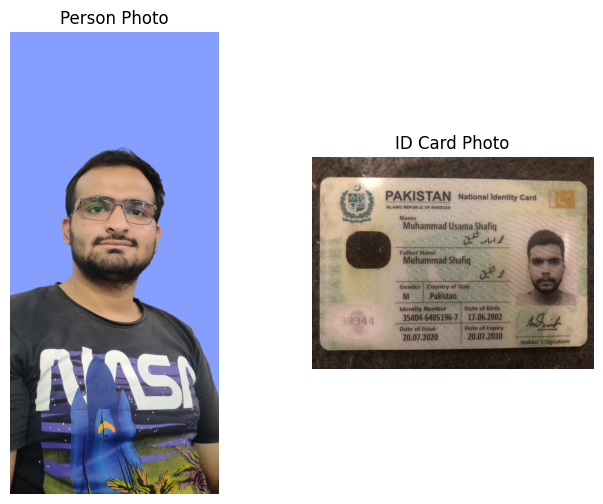

In [59]:
compare_faces(shahzaib,other_person)

### No face in photo

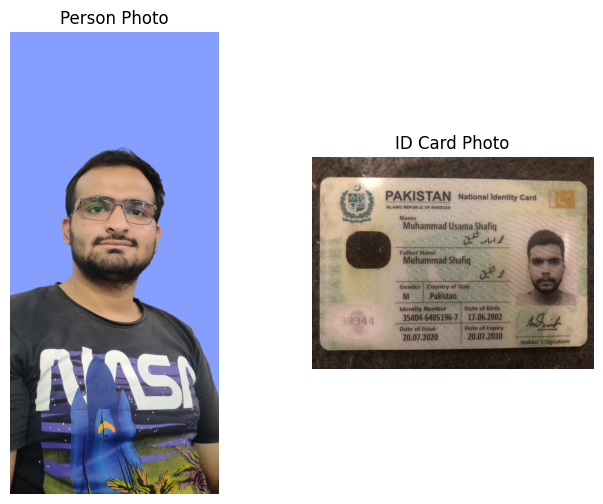

In [63]:

compare_faces( shahzaib, other_person)

### Old ID card

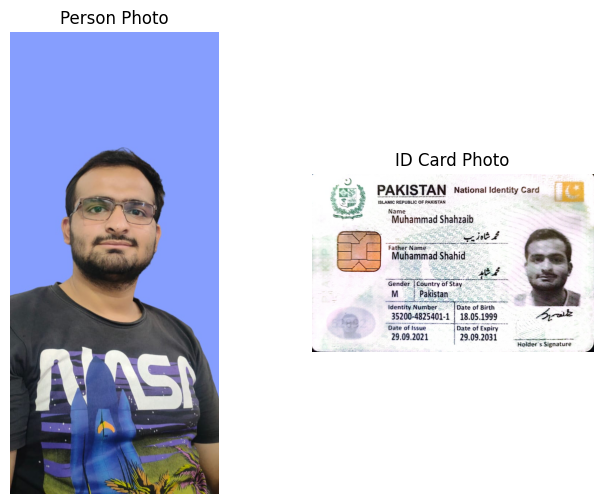

In [64]:
compare_faces("/content/sample_data/muhammadShahzaib.jpg", "/content/sample_data/id_image.jpg")

### Multiple faces

A match was found!


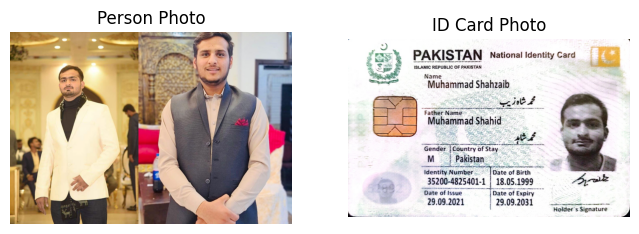

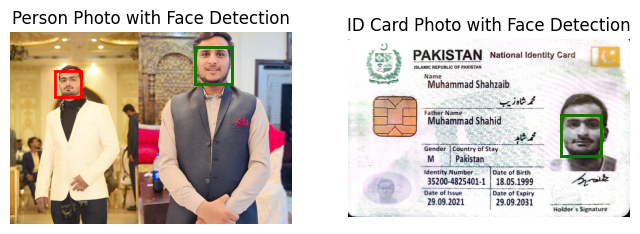

In [68]:
compare_faces("/content/sample_data/two_person.jpg", "/content/sample_data/id_image.jpg")

#### **For 2 persons, it detected both of them. To resolve this issue, we can simply build a different color bounding box for matched person**

# **>> Modified Code**

In [69]:
def compare_faces(person_photo, id_card_photo):
    # Load the person's photo
    person_image = face_recognition.load_image_file(person_photo)
    person_face_encodings = face_recognition.face_encodings(person_image)
    person_face_locations = face_recognition.face_locations(person_image)

    # Load the ID card photo
    id_card_image = face_recognition.load_image_file(id_card_photo)
    id_card_face_encodings = face_recognition.face_encodings(id_card_image)
    id_card_face_locations = face_recognition.face_locations(id_card_image)

    # Check if faces were found
    if len(person_face_encodings) == 0 or len(id_card_face_encodings) == 0:
        print("No faces found in one of the images.")
        return

    # Compare each person's face with each ID card face
    match_found = False
    matched_face_locations = []  # To store matched locations in the person's photo
    matched_id_card_locations = []  # To store matched locations in the ID card photo

    for person_face_encoding, person_face_location in zip(person_face_encodings, person_face_locations):
        for id_card_face_encoding, id_card_face_location in zip(id_card_face_encodings, id_card_face_locations):
            results = face_recognition.compare_faces([person_face_encoding], id_card_face_encoding)
            if results[0]:
                print("A match was found!")
                matched_face_locations.append(person_face_location)  # Store the matching face location in the person's photo
                matched_id_card_locations.append(id_card_face_location)  # Store the matching face location in the ID card photo
                match_found = True
                break
        if match_found:
            break

    if not match_found:
        print("No match found.")

    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(8, 6))

    # Display person's photo
    axes[0].imshow(person_image)
    axes[0].set_title("Person Photo")
    axes[0].axis('off')

    # Display ID card photo
    axes[1].imshow(id_card_image)
    axes[1].set_title("ID Card Photo")
    axes[1].axis('off')

    plt.show()

    # Highlight only matching faces in the images
    # Create a function to plot with rectangles around matching faces
    def plot_faces(image, face_locations, title, matched_locations=None):
        plt.imshow(image)
        plt.title(title)
        plt.axis('off')
        for (top, right, bottom, left) in face_locations:
            plt.gca().add_patch(plt.Rectangle((left, top), right - left, bottom - top,
                                              edgecolor='red', linewidth=2, fill=False))
        # Draw boxes for matched locations
        if matched_locations:
            for (top, right, bottom, left) in matched_locations:
                plt.gca().add_patch(plt.Rectangle((left, top), right - left, bottom - top,
                                                  edgecolor='green', linewidth=2, fill=False))

    # Plotting the faces with rectangles
    plt.figure(figsize=(8, 6))
    plt.subplot(1, 2, 1)
    plot_faces(person_image, person_face_locations, "Person Photo with Face Detection", matched_face_locations)

    plt.subplot(1, 2, 2)
    plot_faces(id_card_image, id_card_face_locations, "ID Card Photo with Face Detection", matched_id_card_locations)

    plt.show()

A match was found!


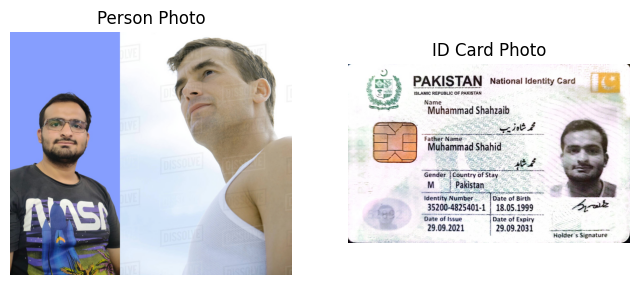

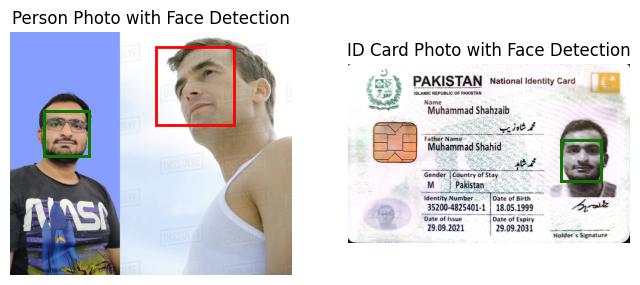

In [71]:
compare_faces("/content/sample_data/two-v3.jpg", "/content/sample_data/id_image.jpg")